# **PENGGUNAAN METODE PCA DAN NORMALISASI**

**IMPORT LIBRARY**

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**LOAD FILE**

In [32]:
from google.colab import files
filenya = files.upload()

Saving penguins.csv to penguins (1).csv


**CEK DATA**

In [162]:
import io
df = pd.read_csv(io.StringIO(filenya['penguins (1).csv'].decode('utf-8')))
df


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


**RENAME**

In [165]:
df = df.rename(columns={'culmen_length_mm': 'panjang_culmen(mm)'})
df = df.rename(columns={'culmen_depth_mm': 'kedalaman_culmen(mm)'})
df = df.rename(columns={'body_mass_g': 'massa_tubuh'})
df = df.rename(columns={'flipper_length_mm': 'panjang_sirip(mm)'})
df = df.rename(columns={'sex': 'Jenis_kelamin'})
df

,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   panjang_culmen(mm)    342 non-null    float64
 1   kedalaman_culmen(mm)  342 non-null    float64
 2   panjang_sirip(mm)     342 non-null    float64
 3   massa_tubuh           342 non-null    float64
 4   Jenis_kelamin         335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


**REPLACE VALUE**

In [167]:
df['Jenis_kelamin'].value_counts()

MALE      169
FEMALE    165
.           1
Name: Jenis_kelamin, dtype: int64

In [168]:
df['Jenis_kelamin'] = df['Jenis_kelamin'].replace('.', 'MALE')
df['Jenis_kelamin'].value_counts()

MALE      170
FEMALE    165
Name: Jenis_kelamin, dtype: int64

**CEK MISSING DATA**

In [169]:
print (df.isnull().sum())
print(25*'=')
print (df.isna().sum())

panjang_culmen(mm)      2
kedalaman_culmen(mm)    2
panjang_sirip(mm)       2
massa_tubuh             2
Jenis_kelamin           9
dtype: int64
panjang_culmen(mm)      2
kedalaman_culmen(mm)    2
panjang_sirip(mm)       2
massa_tubuh             2
Jenis_kelamin           9
dtype: int64


In [170]:
kolom=len(df.columns)
for i in range (0, kolom):
  df=df[df.iloc[:,i]!='?']
  df=df[df.iloc[:,i]!='']
  df=df[~df.iloc[:,i].isna()]
df.isnull().sum()


panjang_culmen(mm)      0
kedalaman_culmen(mm)    0
panjang_sirip(mm)       0
massa_tubuh             0
Jenis_kelamin           0
dtype: int64

In [171]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"missing data: {sum(df.isna().sum())}")

Rows: 335, Columns: 5
Duplicates: 0
missing data: 0


In [172]:
print ("Jumlah baris adalah: ",df.shape[0])
print ("Jumlah kolom adalah: ",df.shape[1])

Jumlah baris adalah:  335
Jumlah kolom adalah:  5


**CEK DAN HAPUS OUTLIER**

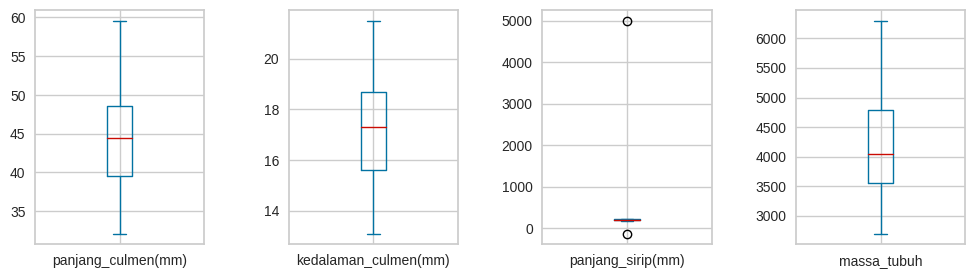

In [173]:
#TERDAPAT DATA MENCURIGAKAN PADA KOLOM ANNUAL INCOME
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);
plt.show()


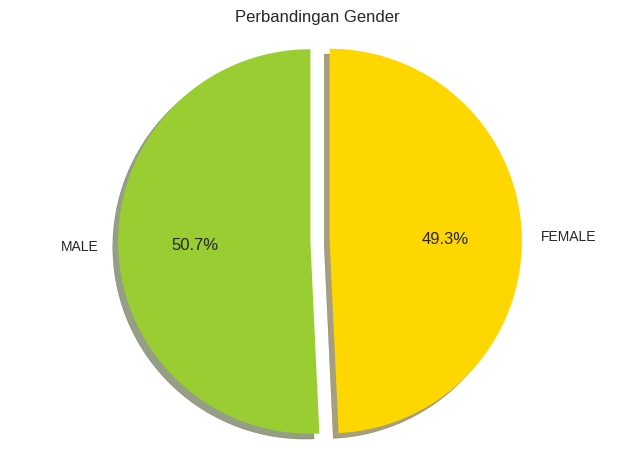

In [174]:
df_piechart = df['Jenis_kelamin'].value_counts()

labels = df_piechart.index
quantity = df_piechart.values
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)

plt.title('Perbandingan Gender ')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

plt.axis('equal')
plt.show()

In [175]:
def Handle_outlier(df, column_name):
    # HITUNG Q1 DAN Q3
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)

    # HITUNG IQR
    IQR = Q3 - Q1

    # Tentukan Batas Bawah Dan Batas Atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # IDENTIFIKASI OUTLIER DENGAN INTERQUARTIL
    outliers = df[column_name][(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers berdasarkan IQR untuk kolom {column_name}:")
        print(outliers)
    else:
        print(f"Tidak ditemukan outlier untuk kolom {column_name} berdasarkan metode interquartile.")

    # GANTI NILAI OUTLIER
    df[column_name] = np.where((df[column_name] < lower_bound), lower_bound, df[column_name])
    df[column_name] = np.where((df[column_name] > upper_bound), upper_bound, df[column_name])


In [176]:
Handle_outlier(df, 'panjang_sirip(mm)')

Outliers berdasarkan IQR untuk kolom panjang_sirip(mm):
9     5000.0
14    -132.0
Name: panjang_sirip(mm), dtype: float64


**LABEL ENCODER**

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping = {'MALE': 0, 'FEMALE': 1}
df['Jenis_kelamin'] = le.fit_transform(df['Jenis_kelamin'].map(mapping))
df


,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


**CEK KEMBALI OUTLIER**

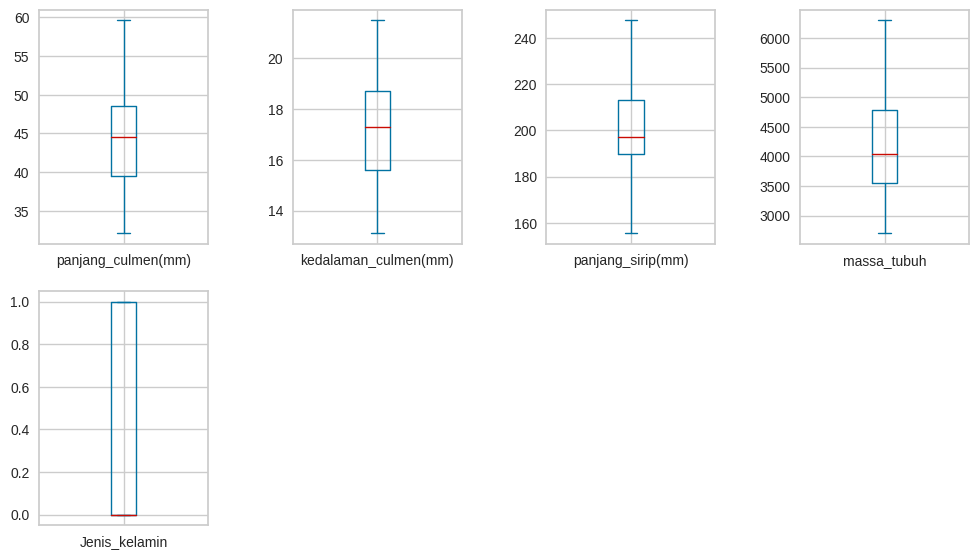

In [178]:
#TERDAPAT DATA MENCURIGAKAN PADA KOLOM ANNUAL INCOME
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);
plt.show()


**CEK HEATMAP**

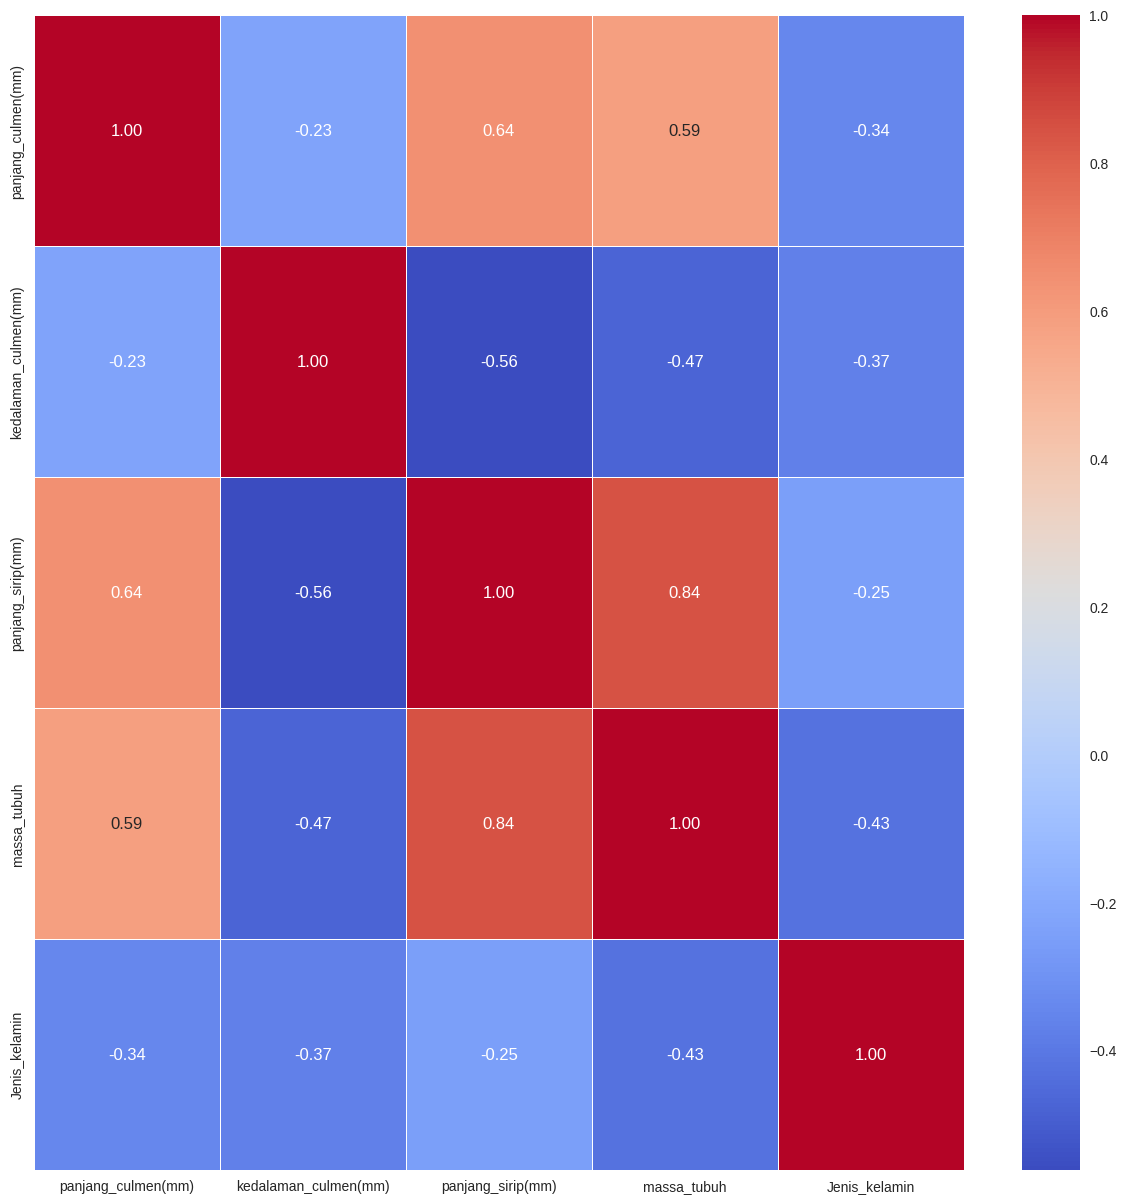

In [179]:
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

**CEK KORELASI PEARSON**

In [180]:
import scipy
from scipy import stats

kolom=len(df.columns)
z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,3,massa_tubuh,0.425913
1,1,kedalaman_culmen(mm),0.372304
2,0,panjang_culmen(mm),0.342198
3,2,panjang_sirip(mm),0.250203


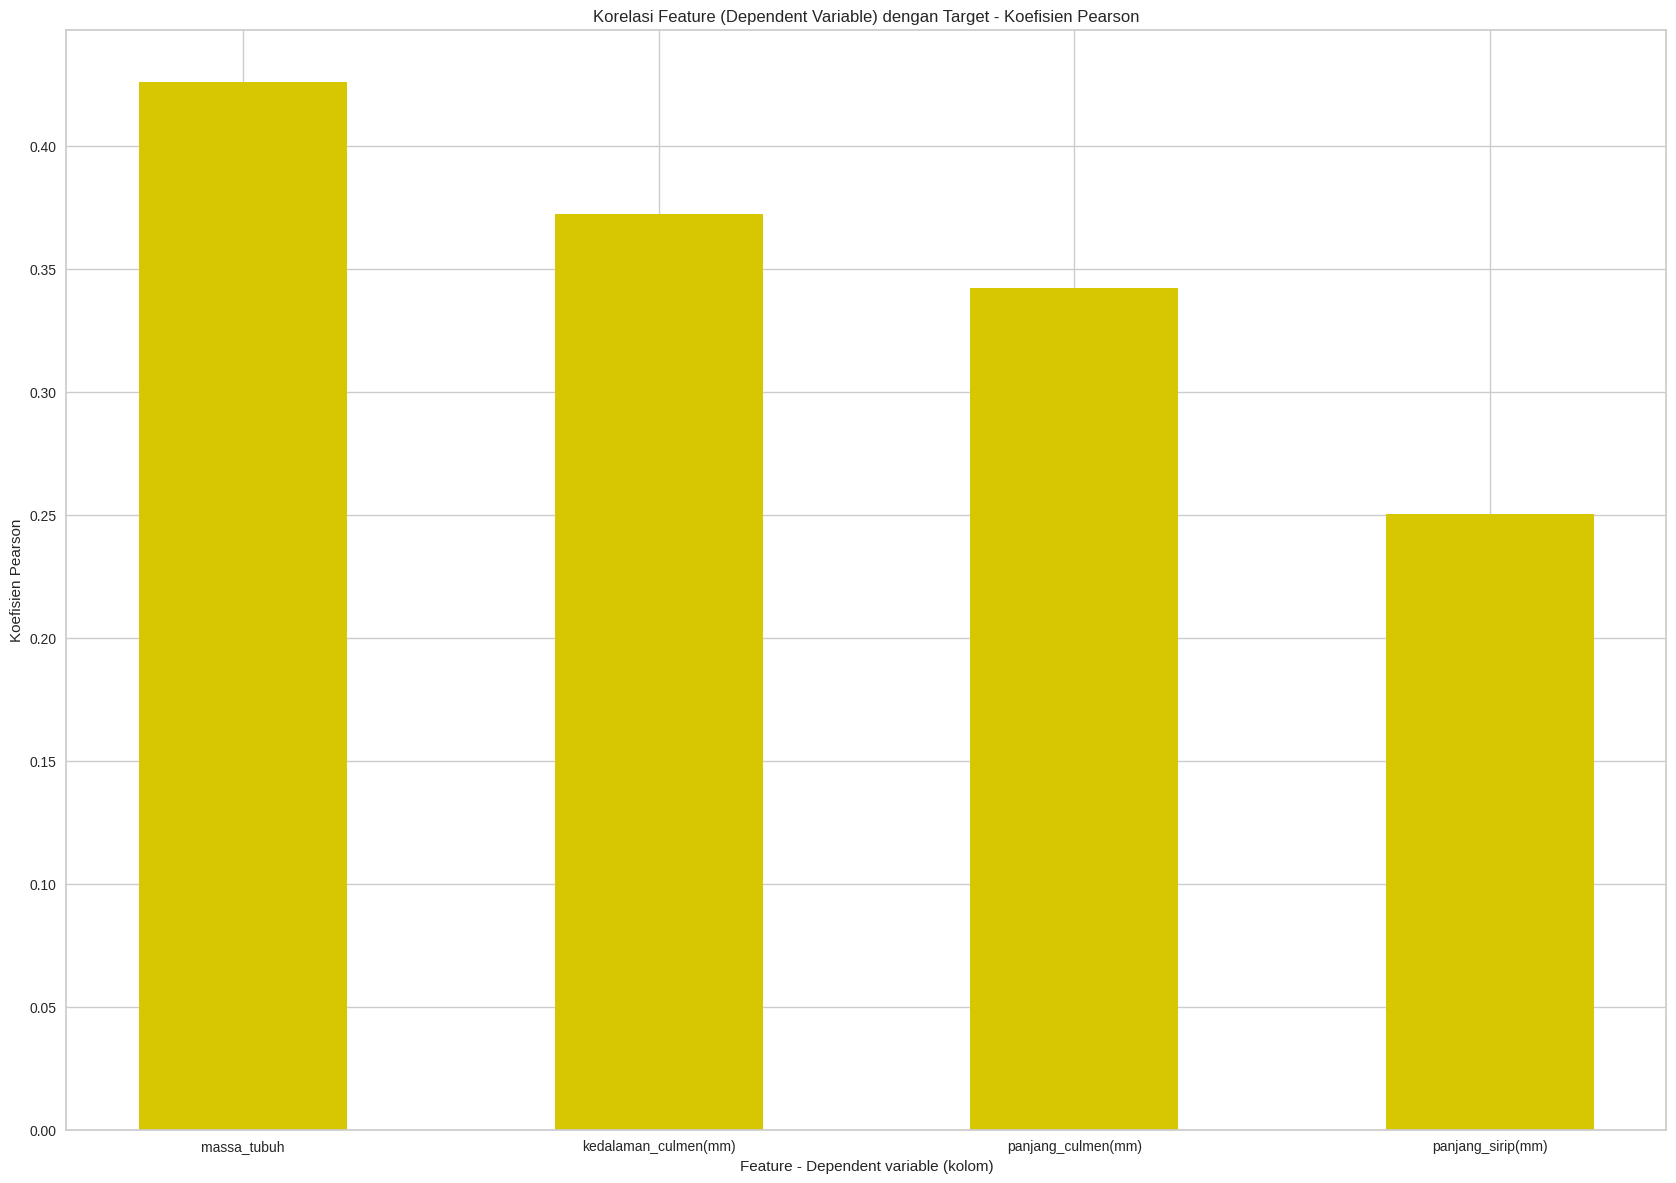

In [181]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

**CEK DISTRIBUSI DATA**

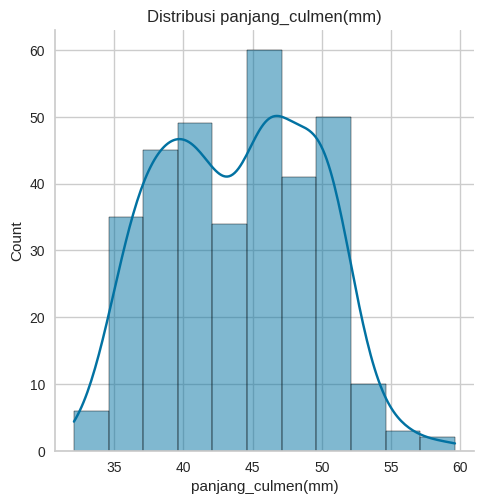

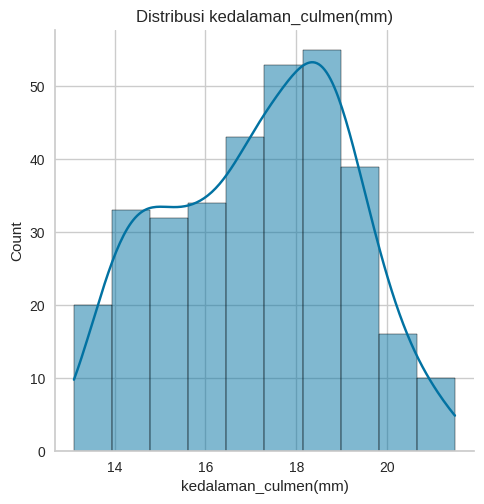

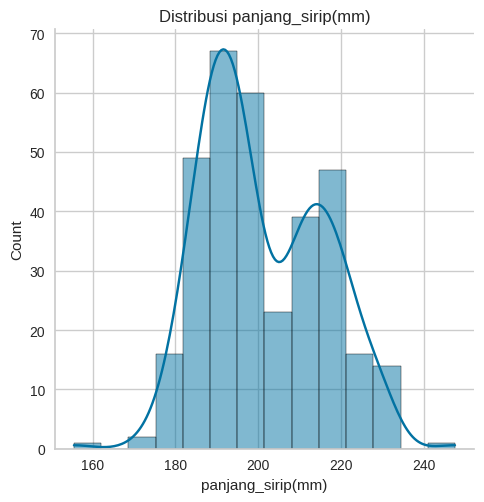

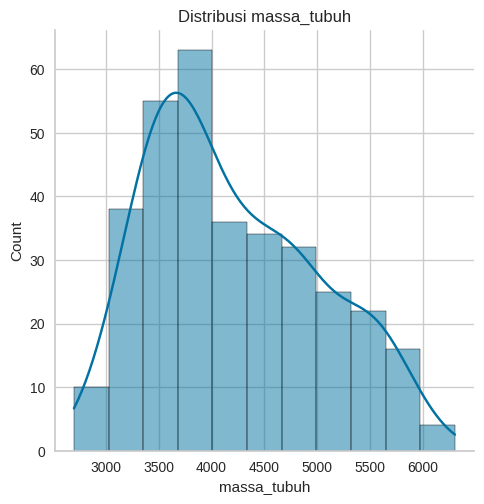

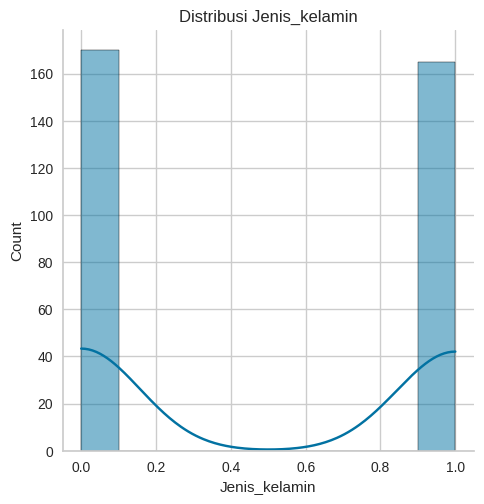

In [182]:
kolom_df = df.columns #Siapkan nama kolom yang akan di looping

for kolom in kolom_df: #buat loopingan untuk menentukan semua kolom yang akan dilooping pada variabel kolom
    sns.displot ( x = kolom, kde = True, data = df)
    plt.title(f"Distribusi {kolom}") #Gunakan 'f' sebagai function untuk mencetak
    plt.show()

**LAKUKAN PCA DAN NORMALISASI**

In [128]:
# from sklearn.preprocessing import StandardScaler
# def normalisasi(df, nama_kolom):
#   scaler = StandardScaler()
#   kolom_data = df[[nama_kolom]]
#   x = scaler.fit_transform(kolom_data)
#   df[nama_kolom] = x
#   return df

In [129]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   panjang_culmen(mm)    335 non-null    float64
 1   kedalaman_culmen(mm)  335 non-null    float64
 2   panjang_sirip(mm)     335 non-null    float64
 3   massa_tubuh           335 non-null    float64
 4   Jenis_kelamin         335 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.8 KB


In [131]:
# normalisasi(df, 'panjang_culmen(mm)')
# normalisasi(df, 'kedalaman_culmen(mm)')
# normalisasi(df, 'panjang_sirip(mm)')
# normalisasi(df, 'massa_tubuh')
# df

,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin
0,-0.897723,0.777263,-1.388431,-0.572233,0
1,-0.824265,0.117037,-1.041789,-0.509923,1
2,-0.677349,0.421757,-0.417833,-1.195338,1
4,-1.338472,1.081983,-0.556490,-0.946096,1
5,-0.860994,1.742210,-0.764475,-0.696854,0
...,...,...,...,...,...
338,0.589802,-1.762070,0.899407,0.892063,1
340,0.516344,-1.457350,0.968736,0.798597,1
341,1.177467,-0.746337,1.454035,1.920186,0
342,0.222512,-1.203417,0.760750,1.234771,1


In [132]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=None)
# dfx_pca = pca.fit(df)
# dfx_pca.explained_variance_ratio_
# n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
# pca = PCA(n_components=n_components)
# penguins_PCA = pca.fit_transform(df)
# print(n_components)

2


**GUNAKAN ELBOW UNTUK MENENTUKAN CLUSTER**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

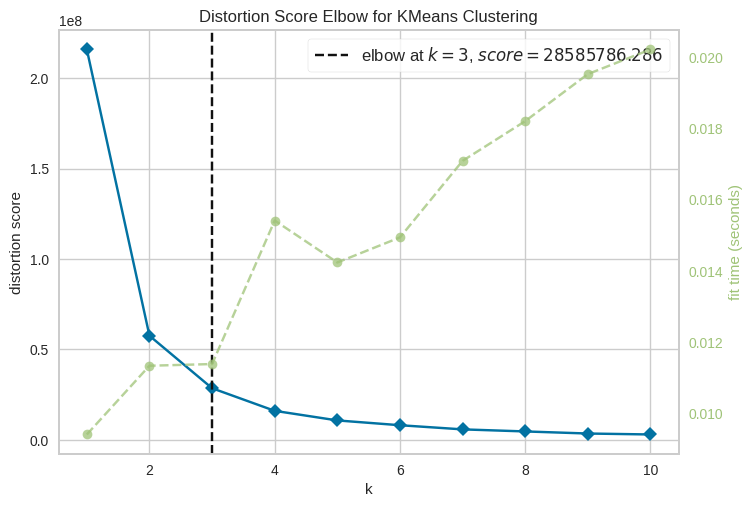

In [183]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer=KElbowVisualizer(KMeans(),k=(1,11))
visualizer.fit(df)
visualizer.poof()

#plt.figure(figsize=(10, 6), dpi=20)
plt.show()

In [184]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[0 0 0 0 0 0 2 2 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 2 0 2 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0
 2 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 2 0 2 0 2
 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 2
 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 1 2 1 1 2 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 0 1 2 2 1
 2 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 1 1 2 1 2 1 2 2 2 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 2 2 1
 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [185]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, y_kmeans)
print("Semakin tinggi nilai Silhouette score maka semakin baik:", silhouette_avg)

Semakin tinggi nilai Silhouette score maka semakin baik: 0.5741839623628705


In [186]:
import numpy as np
df_numpy = np.array(df)

<Figure size 800x550 with 0 Axes>

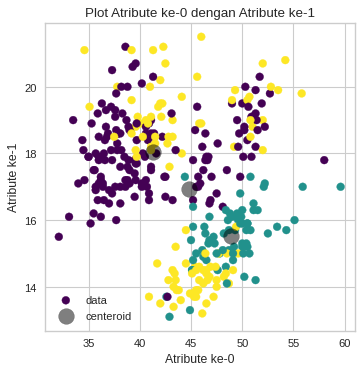

<Figure size 800x550 with 0 Axes>

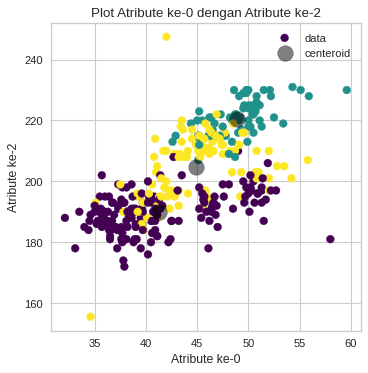

<Figure size 800x550 with 0 Axes>

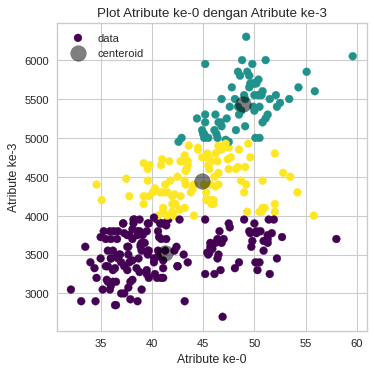

<Figure size 800x550 with 0 Axes>

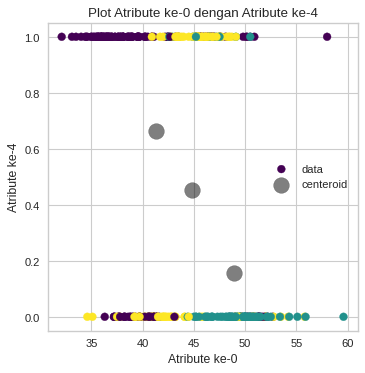

<Figure size 800x550 with 0 Axes>

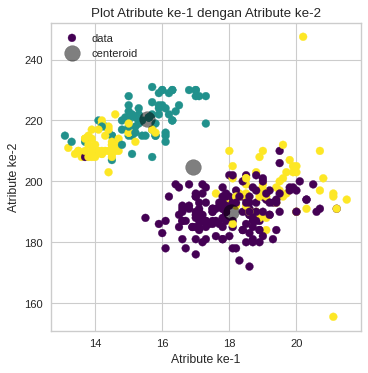

<Figure size 800x550 with 0 Axes>

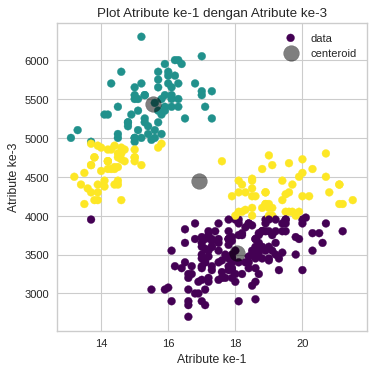

<Figure size 800x550 with 0 Axes>

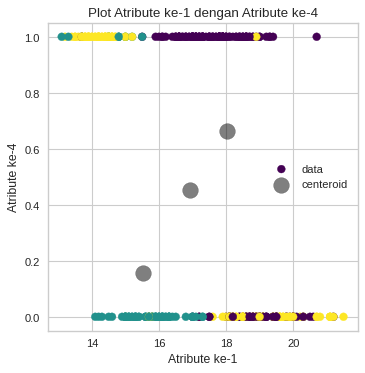

<Figure size 800x550 with 0 Axes>

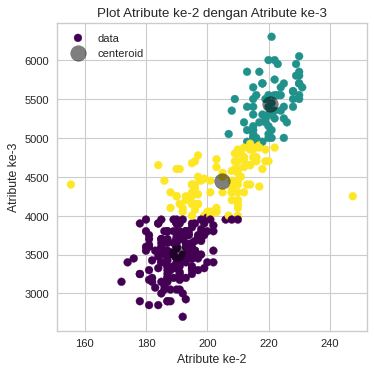

<Figure size 800x550 with 0 Axes>

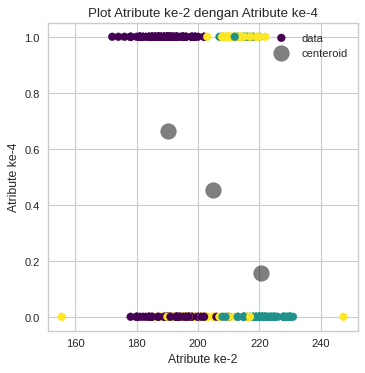

<Figure size 800x550 with 0 Axes>

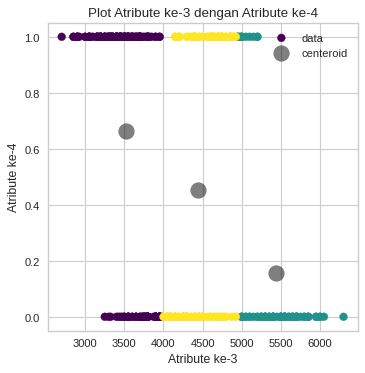

In [187]:
kolomdf=df_numpy.shape[1]
dfX=np.array(df_numpy)
f=0
for i in range (kolomdf-1):
    for j in range (i+1,kolomdf):
      plt.figure(f)
      f=f+1
      plt.figure(figsize=(5, 5), dpi=80)
      plt.scatter(dfX[:,i], dfX[:, j], c=y_kmeans, s=50, cmap='viridis', label='data')
      centers = kmeans.cluster_centers_
      plt.scatter(centers[:, i], centers[:, j], c='black', s=200, alpha=0.5, label='centeroid');
      xlabel='Atribute ke-'+str(i)
      ylabel='Atribute ke-'+str(j)
      titel='Plot '+str(xlabel)+' dengan '+str(ylabel)

      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(titel)
      plt.legend()
      plt.show()

In [191]:
df_plot = df
df_plot['cluster'] = y_kmeans

In [192]:
df_plot

,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin,cluster
0,39.1,18.7,181.0,3750.0,0,0
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,2
340,46.8,14.3,215.0,4850.0,1,2
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,1


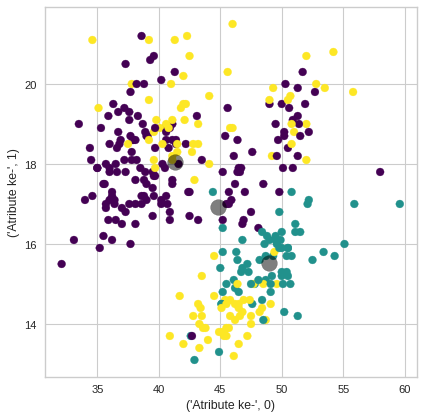

In [193]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(df_scatter[:,0], df_scatter[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='Atribute ke-',0
ylabel='Atribute ke-',1
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

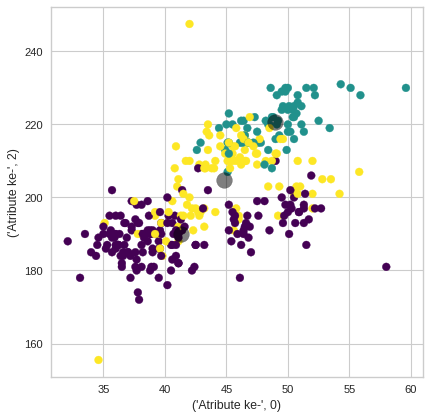

In [194]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(df_scatter[:,0], df_scatter[:,2], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,2], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='Atribute ke-',0
ylabel='Atribute ke-',2
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

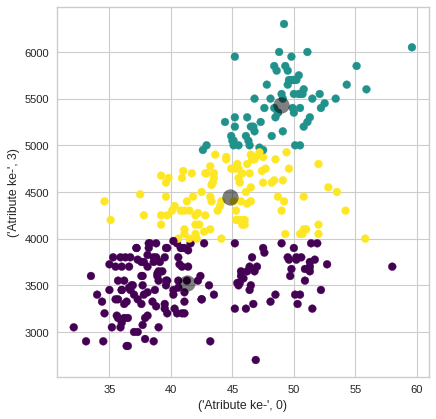

In [195]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(df_scatter[:,0], df_scatter[:,3], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,3], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='Atribute ke-',0
ylabel='Atribute ke-',3
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [196]:
df

,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin,cluster
0,39.1,18.7,181.0,3750.0,0,0
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,2
340,46.8,14.3,215.0,4850.0,1,2
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,1


In [197]:
df['cluster'].value_counts()

0    161
2    104
1     70
Name: cluster, dtype: int64

In [198]:
from sklearn.metrics.cluster import homogeneity_score
hom1= homogeneity_score(df_plot['panjang_culmen(mm)'],df_plot['kedalaman_culmen(mm)'])
hom2= homogeneity_score(df_plot['panjang_culmen(mm)'],df_plot['panjang_sirip(mm)'])
hom3= homogeneity_score(df_plot['panjang_culmen(mm)'],df_plot['massa_tubuh'])
print("Semakin tinggi score homogenety maka semakin baik cluster dalam memisahkan anggota lainya")
print('Homogenity antara panjang_culmen(mm) dengan kedalaman_culmen(mm)  :', hom1)
print('Homogenity antara panjang_culmen(mm) dengan panjang_sirip(mm)  :', hom2)
print('Homogenity antara panjang_culmen(mm) dengan massa_tubuh  :', hom3)

Semakin tinggi score homogenety maka semakin baik cluster dalam memisahkan anggota lainya
Homogenity antara panjang_culmen(mm) dengan kedalaman_culmen(mm)  : 0.6741420382969072
Homogenity antara panjang_culmen(mm) dengan panjang_sirip(mm)  : 0.5997774062362529
Homogenity antara panjang_culmen(mm) dengan massa_tubuh  : 0.6980759047134135


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and continuous values for target

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and continuous values for target

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning:

Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target



In [199]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='panjang_culmen(mm)', y='kedalaman_culmen(mm)', z='massa_tubuh', color='cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# **CENTROID PLOT**

In [200]:
kmeans.fit(df_plot[['panjang_culmen(mm)', 'kedalaman_culmen(mm)', 'massa_tubuh']])
df_plot['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [201]:
centroidsasli = pd.DataFrame(kmeans.cluster_centers_, columns=['panjang_culmen(mm)', 'kedalaman_culmen(mm)', 'massa_tubuh'])
import plotly.express as px
fig = px.scatter_3d(df_plot, x='panjang_culmen(mm)', y='kedalaman_culmen(mm)', z='massa_tubuh', color='cluster', opacity=1)
fig.add_trace(px.scatter_3d(centroidsasli, x='panjang_culmen(mm)', y='kedalaman_culmen(mm)', z='massa_tubuh', size_max=10).data[0])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [202]:
df

,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin,cluster
0,39.1,18.7,181.0,3750.0,0,0
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,2
340,46.8,14.3,215.0,4850.0,1,2
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,1


In [203]:
df = df.drop(['cluster'], axis=1)
df

,panjang_culmen(mm),kedalaman_culmen(mm),panjang_sirip(mm),massa_tubuh,Jenis_kelamin
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


In [204]:
from sklearn import metrics
score=metrics.davies_bouldin_score(df, y_kmeans)
print ('Evaluasi Internal Davies-Bouldin Indeks untuk Algoritma Clustering:', score)

Evaluasi Internal Davies-Bouldin Indeks untuk Algoritma Clustering: 0.5161718260903606
